In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip3 install tensorflow_text

     |████████████████████████████████| 4.4 MB 5.4 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np


In [ ]:
import pandas as pd

Enter your dataset link which is uploaded to Drive

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Medical and nonmedical - Sheet1.csv")
df.head(5)

,Category,Message
0,Nonmedical,"Go until jurong point, crazy.. Available only ..."
1,Nonmedical,Ok lar... Joking wif u oni...
2,Nonmedical,Free entry in 2 a wkly comp to win FA Cup fina...
3,Nonmedical,U dun say so early hor... U c already then say...
4,Nonmedical,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message  ...     
             count  ... freq
Category            ...     
Medical        948  ...    4
Nonmedical    1052  ...    6

[2 rows x 4 columns]

In [ ]:
df['Category'].value_counts()

Nonmedical    1052
Medical        948
Name: Category, dtype: int64

In [ ]:
df_nonmedical = df[df['Category']=='Nonmedical']
df_nonmedical.shape

(1052, 2)

In [ ]:
df['medical']=df['Category'].apply(lambda x: 1 if x=='Medical' else 0)
df.sample(5)

,Category,Message,medical
1448,Nonmedical,U are subscribed to the best Mobile Content Se...,0
1068,Medical,Delays in treatment of acute myocardial infarc...,1
1561,Medical,Percutaneous drainage of traumatic pancreatic ...,1
1861,Medical,Preoperative prediction of pathological tumor ...,1
1044,Nonmedical,4 oclock at mine. Just to bash out a flat plan.,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'],df['medical'], stratify=df['medical'])

In [ ]:
X_train.head(4)

674     Anterior sternal retraction for reoperative me...
1982    Wat makes some people dearer is not just de ha...
187     Comparison of the effects of torasemide and fu...
1529    Happy New year my dear brother. I really do mi...
Name: Message, dtype: object

Working with Bert

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_word_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'sequence_output':  109482241   keras_layer[1][0]                
                                                                 keras_layer[1][1]                
                                                                 keras_layer[1][2]                
____________________________________________________________________________________________

In [ ]:
df.shape

(2000, 3)

In [ ]:
len(X_train)

1500

In [ ]:
X_train.shape

(1500,)

In [ ]:
y_train.shape

(1500,)

In [ ]:

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
47/47 [==============================] - 30s 643ms/step - loss: 0.0622 - accuracy: 0.9920 - precision: 0.9986 - recall: 0.9845
Epoch 2/20
47/47 [==============================] - 30s 642ms/step - loss: 0.0564 - accuracy: 0.9920 - precision: 0.9972 - recall: 0.9859
Epoch 3/20
47/47 [==============================] - 30s 639ms/step - loss: 0.0547 - accuracy: 0.9933 - precision: 0.9972 - recall: 0.9887
Epoch 4/20
47/47 [==============================] - 30s 640ms/step - loss: 0.0496 - accuracy: 0.9927 - precision: 0.9972 - recall: 0.9873
Epoch 5/20
47/47 [==============================] - 30s 640ms/step - loss: 0.0464 - accuracy: 0.9927 - precision: 0.9986 - recall: 0.9859
Epoch 6/20
47/47 [==============================] - 30s 640ms/step - loss: 0.0433 - accuracy: 0.9933 - precision: 0.9972 - recall: 0.9887
Epoch 7/20
47/47 [==============================] - 30s 640ms/step - loss: 0.0401 - accuracy: 0.9920 - precision: 0.9957 - recall: 0.9873
Epoch 8/20
47/47 [================

In [ ]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 10s 630ms/step - loss: 0.0262 - accuracy: 0.9940 - precision: 0.9958 - recall: 0.9916


[0.026166576892137527,
 0.9940000176429749,
 0.9957627058029175,
 0.9915611743927002]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[262,   1],
       [  2, 235]])

Text(33.0, 0.5, 'Truth')

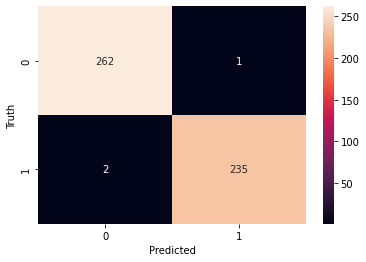

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       263
           1       1.00      0.99      0.99       237

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

